In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)
from tqdm import tqdm
import datetime
from collections import Counter
import re

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [3]:
data_train = pd.read_csv('/Users/s0c02nj/Desktop/Mahindra/train_5CLrC8b/train.csv')
#data_dict = pd.read_csv('/Users/s0c02nj/Desktop/train_5CLrC8b/Data_Dictionary.xlsx')
data_test = pd.read_csv('/Users/s0c02nj/Desktop/Mahindra/test.csv')
data_sub = pd.read_csv('/Users/s0c02nj/Desktop/Mahindra/sample_submission.csv')

In [4]:
data_train['reservation_id'].unique().shape

(341424,)

In [5]:
data_train.shape

(341424, 24)

In [6]:
set(data_train['reservation_id']).intersection(set(data_test['reservation_id']))

set()

In [7]:
data_train['memberid'].unique().shape

(101327,)

In [8]:
data_train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [9]:
data_train['member_age_buckets'].unique()

array(['F', 'H', 'D', 'E', 'I', 'G', 'C', 'B', 'A', 'J'], dtype=object)

In [10]:
data_train.columns.shape

(24,)

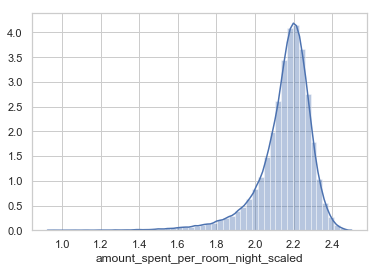

In [25]:
sns.distplot(np.log1p(data_train['amount_spent_per_room_night_scaled']))

In [12]:
mu = data_train['amount_spent_per_room_night_scaled'].mean()
sigma =  np.sqrt(data_train['amount_spent_per_room_night_scaled'].var())

thres_u = mu+3*sigma
thres_l = mu-3*sigma

ind=[]
for i in tqdm(range(0,len(data_train))):
    val = data_train['amount_spent_per_room_night_scaled'].iloc[i]
    
    if val <=thres_u and val >=thres_l :
        ind.append(1)
    else :
        ind.append(0)
    

100%|██████████| 341424/341424 [00:04<00:00, 83569.84it/s]


In [24]:
ind.count(0)
len(ind)

341424

In [36]:
gen_norm = np.random.normal(mu, sigma, data_sub.shape[0])

In [39]:
data_sub['amount_spent_per_room_night_scaled'] = gen_norm

In [40]:
data_sub.to_csv('/Users/s0c02nj/Desktop/sub_ran_norm.csv',index=False)